# Adult Census Income Prediction Model

In [1]:
#Sachin kumar
#21MCA0289

<div class="alert alert-block alert-info">

<h1 style="font-family:verdana;"> Description:</h1> 

<ul>
<li><p style="font-family:verdana;">
In this notebook, we are going to predict whether a person's income is above 50k or below 50k using various features like age, education, and occupation.
</p></li>
    
<li><p style="font-family:verdana;">
The dataset we are going to use is the Adult census income dataset from Kaggle which contains about 32561 rows and 15 features that can be downloaded <a href="https://www.kaggle.com/overload10/adult-census-dataset">here</a>.
</p></li> 

<li><p style="font-family:verdana;">
The dataset contains the labels which we have to predict and the labels are discrete and binary. So the problem we have is a Supervised Classification type.
</p></li>  
</ul>

</div>

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv('../Datasets/adult.csv')
df.tail(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
32551,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32552,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
df.shape

(32561, 15)

In [6]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
country           object
salary            object
dtype: object

In [7]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
country              42
salary                2
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [10]:
# Check for null values
round((df.isnull().sum() / df.shape[0]) * 100, 2).astype(str) + ' %'

age               0.0 %
workclass         0.0 %
fnlwgt            0.0 %
education         0.0 %
education-num     0.0 %
marital-status    0.0 %
occupation        0.0 %
relationship      0.0 %
race              0.0 %
sex               0.0 %
capital-gain      0.0 %
capital-loss      0.0 %
hours-per-week    0.0 %
country           0.0 %
salary            0.0 %
dtype: object

In [11]:
# Check for '?' in dataset
round((df.isin([' ?']).sum() / df.shape[0]) * 100, 2).astype(str) + ' %'

age                0.0 %
workclass         5.64 %
fnlwgt             0.0 %
education          0.0 %
education-num      0.0 %
marital-status     0.0 %
occupation        5.66 %
relationship       0.0 %
race               0.0 %
sex                0.0 %
capital-gain       0.0 %
capital-loss       0.0 %
hours-per-week     0.0 %
country           1.79 %
salary             0.0 %
dtype: object

In [12]:
# Checking the counts of label categories
salary = df['salary'].value_counts(normalize=True)
round(salary * 100, 2).astype('str') + ' %'

 <=50K    75.92 %
 >50K     24.08 %
Name: salary, dtype: object

<div class="alert alert-block alert-info">

<h3 style="font-family:verdana;"> Observations:</h3>

<ul>
    
<li><p style="font-family:verdana;">
The dataset doesn't have any null values, but it contains missing values in the form of '?' which needs to be preprocessed.
</p></li>    

<li><p style="font-family:verdana;">
The dataset is unbalanced, as the dependent feature 'income' contains 75.92% values have income less than 50k and 24.08% values have income more than 50k.
</p></li>    

</ul>

</div>

## Feature Engineering

In [13]:
df.education=df.education.replace(['Preschool','1st-4th','5th-6th','12th','9th','7th-8th','10th','11th'],'school',regex=True)
df.education=df.education.replace('HS-grad','High-school',regex=True)
df.education=df.education.replace(['Some-college','Bachelors','Assoc-voc','Assoc-acdm'],'undergrad',regex=True)
df.education=df.education.replace(['Masters','Prof-school'],'Postgrad',regex=True)


In [14]:
df['marital-status']=df['marital-status'].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'],'Married',regex=True)
df['marital-status']=df['marital-status'].replace('Never-married','un-married',regex=True)
df['marital-status']=df['marital-status'].replace(['Divorced','Separated','Widowed'],'others',regex=True)

In [15]:
df.salary=df.salary.replace('<=50K',0,regex=True)
df.salary=df.salary.replace('>50K',1,regex=True)

In [16]:
df['salary']=df['salary'].apply(int)

In [17]:
df['salary'].dtypes

dtype('int64')

In [18]:
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
32556,27,Private,257302,undergrad,12,Married,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,High-school,9,Married,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,High-school,9,others,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,High-school,9,un-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0
32560,52,Self-emp-inc,287927,High-school,9,Married,Exec-managerial,Wife,White,Female,15024,0,40,United-States,1


## Step 2: Data Visualization

In [19]:
df.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234037
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.009463
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.335154
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.223329
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.150526
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.229689
salary,0.234037,-0.009463,0.335154,0.223329,0.150526,0.229689,1.000000


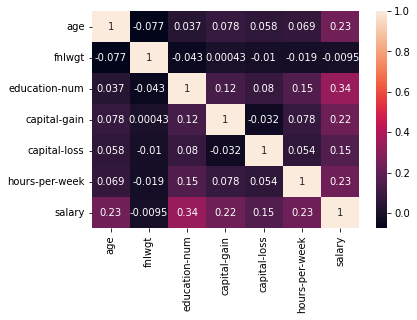

In [20]:
sns.heatmap(df.corr(),annot=True);

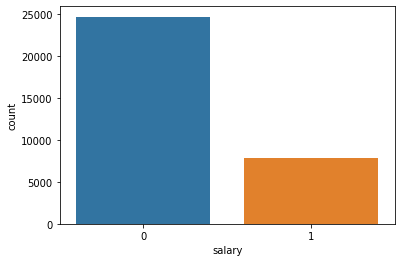

In [21]:
sns.countplot(x=df['salary'],data=df);


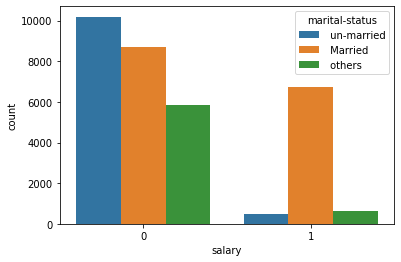

In [22]:
sns.countplot(x=df['salary'],hue="marital-status",data=df);

### Histogram

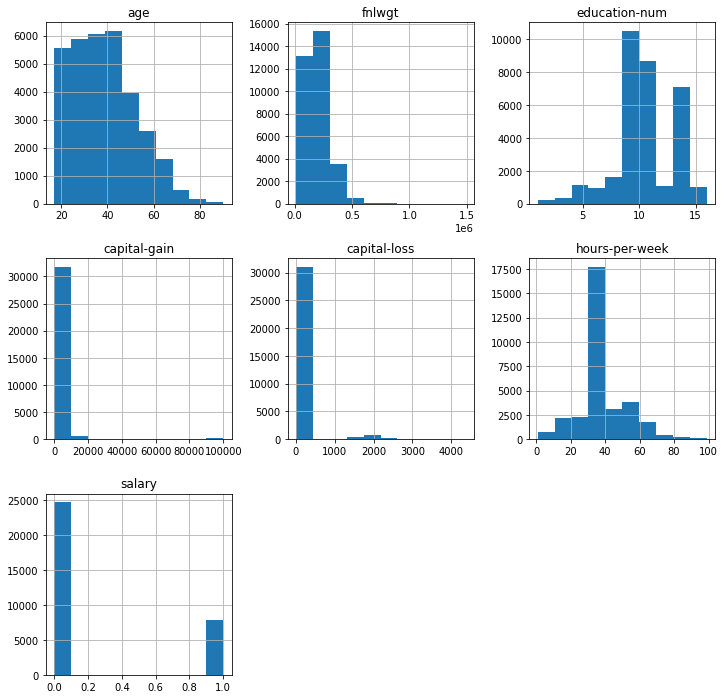

In [23]:
df.hist(figsize=(12,12),layout=(3,3),sharex=False);

### Box Plot

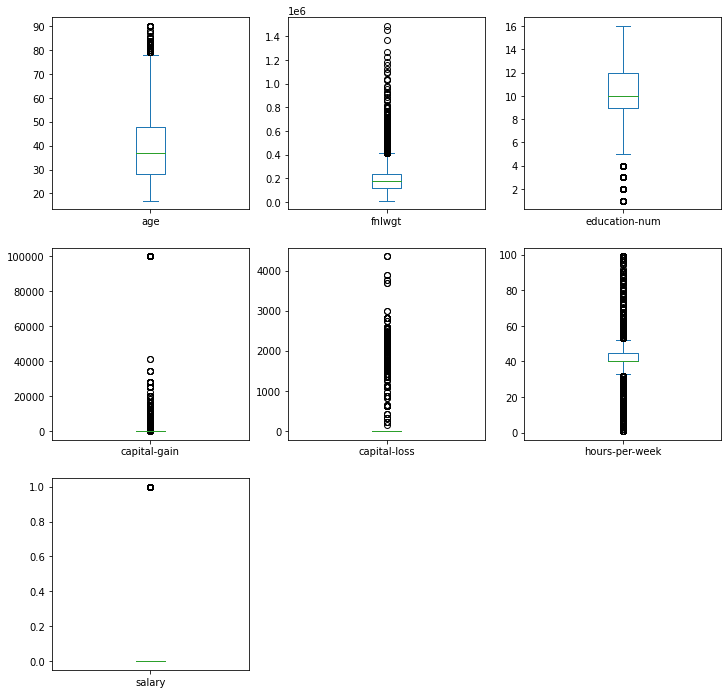

In [24]:
df.plot(kind='box',figsize=(12,12),layout=(3,3),sharex=False,subplots=True);

### Plotly

In [25]:
px.pie(df,values='education-num',names='education',title='% of edu',color_discrete_sequence=px.colors.qualitative.T10)

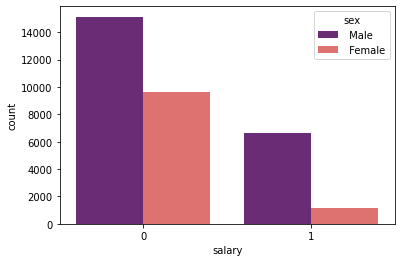

In [26]:
sns.countplot(df['salary'],hue='sex',data=df,palette='magma');

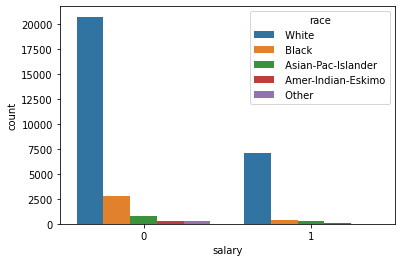

In [27]:
sns.countplot(x=df['salary'],hue="race",data=df);

In [28]:
fig = px.scatter(df, x='capital-gain',y='hours-per-week',title='Scatter Plot capital-gain and hours-per-week as per sex',color='sex')
fig.show()

<div class="alert alert-block alert-info">

<h3 style="font-family:verdana;"> Observations:</h3>

<ul>
        
<li><p style="font-family:verdana;">
In this dataset, the most number of people are young, white, male, Undergraduates with 10 years of education and work 40 hours per week.
</p></li>    

<li><p style="font-family:verdana;">
From the correlation heatmap, we can see that the dependent feature 'salary' is highly correlated with age, numbers of years of education, capital gain and number of hours per week.
</p></li>    

</ul>

</div>

## Step 3: Data Preprocessing

### 3.1: Fixing '?' values in the dataset

In [29]:
df = df.replace(' ?', np.nan)

In [30]:
# Checking null values
round((df.isnull().sum() / df.shape[0]) * 100, 2).astype(str) + ' %'

age                0.0 %
workclass         5.64 %
fnlwgt             0.0 %
education          0.0 %
education-num      0.0 %
marital-status     0.0 %
occupation        5.66 %
relationship       0.0 %
race               0.0 %
sex                0.0 %
capital-gain       0.0 %
capital-loss       0.0 %
hours-per-week     0.0 %
country           1.79 %
salary             0.0 %
dtype: object

In [31]:
columns_with_nan = ['workclass', 'occupation', 'country']

In [32]:
for col in columns_with_nan:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [33]:
fig=px.pie(df,values='hours-per-week',names='occupation',color_discrete_sequence=px.colors.sequential.RdBu_r,title='Pie Chart showing occupation and hours-per-week')
fig.update_traces(textposition='inside',textinfo='percent+label')
fig.show()

### 3.2: Label Encoding

In [34]:
from sklearn.preprocessing import LabelEncoder


In [35]:
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

### 3.3: Feature Selection

In [36]:
X=df.drop('salary',axis=1)
Y=df['salary']

In [37]:
from sklearn.ensemble import ExtraTreesClassifier
selector = ExtraTreesClassifier(random_state=42)

In [38]:
selector.fit(X, Y)


ExtraTreesClassifier(random_state=42)

In [39]:
feature_imp = selector.feature_importances_

In [40]:
for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))

0 15.03
1 4.13
2 16.92
3 3.52
4 9.17
5 10.95
6 7.34
7 6.51
8 1.43
9 2.37
10 8.73
11 2.75
12 9.61
13 1.53


In [41]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int32
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  int32
 4   education-num   32561 non-null  int64
 5   marital-status  32561 non-null  int32
 6   occupation      32561 non-null  int32
 7   relationship    32561 non-null  int32
 8   race            32561 non-null  int32
 9   sex             32561 non-null  int32
 10  capital-gain    32561 non-null  int64
 11  capital-loss    32561 non-null  int64
 12  hours-per-week  32561 non-null  int64
 13  country         32561 non-null  int32
dtypes: int32(8), int64(6)
memory usage: 2.5 MB


In [42]:
X = X.drop(['capital-gain','fnlwgt', 'race','education-num',
            'capital-loss'], axis=1)

### 3.4: Feature Scaling

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

### 3.5: Fixing imbalanced dataset using Oversampling

In [45]:
round(Y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    75.92 %
1    24.08 %
Name: salary, dtype: object

In [46]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

In [47]:
ros.fit(X, Y)

RandomOverSampler(random_state=42)

In [48]:
X_resampled, Y_resampled = ros.fit_resample(X, Y)

In [49]:
round(Y_resampled.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    50.0 %
1    50.0 %
Name: salary, dtype: object

## Step 4: Data Modelling

### Importing Classifier model From Libraries

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

### Importing Performance check Score from Libraries


In [51]:
import time
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

## USING GRIDSEARCH CV

In [52]:
model_params = {
    'random forest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[1,10,20]
            
        }
    },
    'logistic regression':{
        'model':LogisticRegression(solver = 'liblinear',multi_class = 'auto'),
        'params':{
            'C':[1,10,20]
        }
    },
    'K Nearest Neighbors':{
        'model':KNeighborsClassifier(),
        'params':{
            'n_neighbors':[1,5,10]
        }
    }
    
}

In [53]:
scores = []
for model_name,mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'],cv = 2,return_train_score = False)
    start=time.time()
    clf.fit(X_resampled,Y_resampled)
    stop=time.time()
    scores.append({
        'model':model_name,
        'best_score':clf.best_score_,
        'best parameter':clf.best_params_,
        'Training Time':stop-start,
    })

In [54]:
final = pd.DataFrame(scores,columns = ['model','best_score','best parameter','Training Time'])
final

,model,best_score,best parameter,Training Time
0,random forest,0.876032,{'n_estimators': 20},5.981560
1,logistic regression,0.758192,{'C': 10},0.748041
2,K Nearest Neighbors,0.817456,{'n_neighbors': 1},29.877238


# SAVING THE MODEL USING JOBLIB

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
rfc = RandomForestClassifier()

In [57]:
x_train,x_test,y_train,y_test = train_test_split(X_resampled, Y_resampled,test_size = 0.2)

In [58]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [59]:
new_y_test = np.array(y_test)

In [60]:
new_y_test

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [61]:
y_pred = rfc.predict(x_test)
rfc.score(x_test,y_test)

0.8847087378640777

In [62]:
import joblib

In [63]:
filename = 'Adult_census_prediction.sav'
joblib.dump(rfc,filename)

['Adult_census_prediction.sav']

In [64]:
x_train

,age,workclass,education,marital-status,occupation,relationship,sex,hours-per-week,country
42636,-0.189267,-0.085296,0.947399,-0.967387,-0.790092,-0.900181,0.703071,1.584366,0.26137
33458,1.716860,-0.085296,-0.521356,-0.967387,0.720237,-0.900181,0.703071,-3.113041,0.26137
44518,0.177296,-0.085296,0.947399,-0.967387,1.475401,2.211698,-1.422331,-1.250276,0.26137
44789,0.983734,-0.085296,0.947399,-0.967387,0.216794,2.211698,-1.422331,-1.655225,0.26137
46128,0.397233,-0.085296,0.947399,0.164574,-1.041813,0.344571,0.703071,0.612489,0.26137
...,...,...,...,...,...,...,...,...,...
12442,1.130359,-0.085296,-1.255733,-0.967387,-0.034928,-0.900181,0.703071,0.369519,0.26137
35989,0.177296,0.817902,-0.521356,-0.967387,-0.790092,2.211698,-1.422331,1.179417,0.26137
41254,0.177296,-0.085296,-1.255733,-0.967387,1.223679,-0.900181,0.703071,0.369519,0.26137
28331,-0.555830,-0.085296,-1.255733,0.164574,0.216794,1.589322,-1.422331,-0.845327,0.26137


<div class="alert alert-block alert-info">

<h3 style="font-family:verdana;"> Conclusion:</h3>

<ul>
    
<li><p style="font-family:verdana;">
In this project, we build various models like logistic regression, knn classifier, support vector classifier and random forest classifier.
</p></li>    

<li><p style="font-family:verdana;">
A hyperparameter tuned random forest classifier gives the highest accuracy score of 90.88.
</p></li>    

</ul>

</div>

<div class="alert alert-block alert-info">

<h3 style="font-family:verdana;"> Future work:</h3>

<ul>
        
<li><p style="font-family:verdana;">
We have a large enough dataset, so we can use neural networks such as an artificial neural network to build a model which can result in better performance.
</p></li>    

</ul>

</div>